# MTA Data Challenges

Quick Note:  
I wanted to do all challenges without using Pandas in order to practice using Python more.  
However, due to time constraints I was forced to abandon this plan, which is why I switched to Pandas from Challenge 5 onwards. 


In [2]:
from __future__ import division
import csv
from datetime import datetime
from collections import Counter

### Challenge 1

In [1]:
!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_150627.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.0M    0 24.0M    0     0  9984k      0 --:--:--  0:00:02 --:--:-- 9985k


In [3]:
with open('turnstile_150627.txt') as f:
    reader = csv.reader(f)
    rows = [[cell.strip() for cell in row] for row in reader]

In [4]:
assert rows.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME',
                       'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES',
                       'EXITS']

In [5]:
raw_readings = {}
for row in rows:
    raw_readings.setdefault(tuple(row[:4]), []).append(row[4:])

In [6]:
raw_readings.items()[0]

(('A030', 'R083', '01-06-00', '23 ST-5 AVE'),
 [['NR',
   'BMT',
   '06/20/2015',
   '00:00:00',
   'REGULAR',
   '0005938862',
   '0003304207'],
  ['NR',
   'BMT',
   '06/20/2015',
   '04:00:00',
   'REGULAR',
   '0005938915',
   '0003304220'],
  ['NR',
   'BMT',
   '06/20/2015',
   '08:00:00',
   'REGULAR',
   '0005938934',
   '0003304249'],
  ['NR',
   'BMT',
   '06/20/2015',
   '12:00:00',
   'REGULAR',
   '0005939047',
   '0003304407'],
  ['NR',
   'BMT',
   '06/20/2015',
   '16:00:00',
   'REGULAR',
   '0005939329',
   '0003304623'],
  ['NR',
   'BMT',
   '06/20/2015',
   '20:00:00',
   'REGULAR',
   '0005939679',
   '0003304886'],
  ['NR',
   'BMT',
   '06/21/2015',
   '00:00:00',
   'REGULAR',
   '0005939870',
   '0003304930'],
  ['NR',
   'BMT',
   '06/21/2015',
   '04:00:00',
   'REGULAR',
   '0005939929',
   '0003304939'],
  ['NR',
   'BMT',
   '06/21/2015',
   '08:00:00',
   'REGULAR',
   '0005939946',
   '0003304953'],
  ['NR',
   'BMT',
   '06/21/2015',
   '12:00:00',
   

`raw_readings` is a solution to Challenge 1.

### Challenge 2

In [63]:
datetime_cumulative = {turnstile: [(datetime.strptime(date + time,
                                                      '%m/%d/%Y%X'),
                                    int(in_cumulative))
                                   for _, _, date, time,
                                       _, in_cumulative, _ in rows]
                       for turnstile, rows in raw_readings.items()}

In [64]:
for rows in datetime_cumulative.values():
    assert rows == sorted(rows)

In [65]:
datetime_count_times = {turnstile: [[rows[i][0],
                                     rows[i+1][1] - rows[i][1],
                                     rows[i+1][0] - rows[i][0]]
                                    for i in range(len(rows) - 1)]
                        for turnstile, rows in datetime_cumulative.items()}

In [10]:
all_counts = [count for rows in datetime_count_times.values() for _, count, _ in rows]
all_counts.sort()
print all_counts[-50:]

[2428, 2443, 2444, 2447, 2448, 2455, 2456, 2459, 2473, 2474, 2487, 2492, 2514, 2521, 2536, 2548, 2552, 2554, 2558, 2567, 2569, 2579, 2602, 2612, 2621, 2622, 2630, 2630, 2644, 2656, 2670, 2671, 2692, 2728, 2731, 2757, 2765, 2804, 2844, 2848, 2920, 2926, 2926, 3488, 87577, 130932, 131711, 131792, 531430, 117440499]


In [11]:
print all_counts[:1200]

[-1208464910, -8664797, -7691983, -1958436, -1283643, -531174, -131370, -131215, -130432, -87562, -73467, -65355, -2545, -1929, -1852, -1782, -1720, -1703, -1687, -1677, -1662, -1659, -1645, -1608, -1572, -1571, -1553, -1543, -1533, -1524, -1492, -1484, -1482, -1455, -1410, -1404, -1403, -1402, -1401, -1397, -1378, -1376, -1362, -1357, -1345, -1339, -1332, -1326, -1323, -1311, -1303, -1302, -1299, -1292, -1290, -1290, -1289, -1268, -1263, -1260, -1257, -1246, -1236, -1233, -1226, -1217, -1205, -1196, -1194, -1184, -1182, -1136, -1133, -1130, -1130, -1126, -1120, -1119, -1116, -1113, -1111, -1105, -1094, -1092, -1089, -1086, -1084, -1079, -1077, -1071, -1065, -1059, -1058, -1044, -1036, -1035, -1028, -1021, -1021, -1012, -1000, -995, -994, -991, -991, -978, -968, -965, -965, -962, -957, -957, -954, -952, -943, -937, -933, -932, -930, -919, -911, -908, -886, -885, -884, -882, -882, -873, -871, -869, -868, -862, -858, -842, -840, -838, -832, -825, -822, -820, -818, -814, -813, -801, -800,

In [12]:
all_times = [duration.total_seconds() / 60 / 60
             for rows in datetime_count_times.values()
             for _, _, duration in rows]
print Counter(all_times).most_common(10)

[(4.0, 172791), (4.2, 10460), (8.0, 189), (4.433333333333334, 161), (0.02222222222222222, 80), (0.02277777777777778, 64), (0.022500000000000003, 55), (0.02777777777777778, 26), (0.03611111111111111, 24), (3.963888888888889, 24)]


In [66]:
datetime_counts = {turnstile: [(time, count)
                               for (time, count, _) in rows
                               if 0 <= count <= 5000]
                   for turnstile, rows in datetime_count_times.items()}

`datetime_counts` is a solution to Challenge 2.

In [14]:
all_good_counts = [count for rows in datetime_counts.values() for _, count in rows]
print len(all_good_counts) / len(all_counts)

0.99415985405


In [15]:
all_good_counts.sort()
print all_good_counts[-5:]

[2848, 2920, 2926, 2926, 3488]


In [16]:
print all_good_counts[:5]

[0, 0, 0, 0, 0]


### Challenge 3

In [112]:
day_counts = {}
for turnstile, rows in datetime_counts.items():
    by_day = {}
    for time, count in rows:
        day = time.date()
        by_day[day] = by_day.get(day, 0) + count
    day_counts[turnstile] = sorted(by_day.items())

print day_counts.items()[350]

(('A055', 'R227', '00-00-04', 'RECTOR ST'), [(datetime.date(2015, 6, 20), 166), (datetime.date(2015, 6, 21), 136), (datetime.date(2015, 6, 22), 639), (datetime.date(2015, 6, 23), 666), (datetime.date(2015, 6, 24), 644), (datetime.date(2015, 6, 25), 685), (datetime.date(2015, 6, 26), 496)])


`day_counts` is a solution to Challenge 3.

### Challenge 4

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

In [33]:
home_turnstile = day_counts.items()[350]
dates = []
counts = []
for entry in home_turnstile[1]:
    dates.append(entry[0])
    counts.append(entry[1])

print dates[:10]
print counts[:10]

[datetime.date(2015, 6, 20), datetime.date(2015, 6, 21), datetime.date(2015, 6, 22), datetime.date(2015, 6, 23), datetime.date(2015, 6, 24), datetime.date(2015, 6, 25), datetime.date(2015, 6, 26)]
[166, 136, 639, 666, 644, 685, 496]


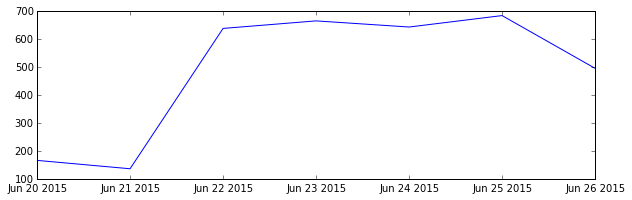

In [34]:
plt.figure(figsize=(10,3))
plt.plot(dates,counts)

###Challenge 5

In [125]:
station_counts = {}
for key, value in day_counts.iteritems():
    station_counts.setdefault(tuple((str(key[0]+" "+key[1]+" "+key[3]).split())), []).append(value)

print station_counts.items()[0]

(('N338', 'R128', 'SUTPHIN', 'BLVD'), [[(datetime.date(2015, 6, 20), 403), (datetime.date(2015, 6, 21), 287), (datetime.date(2015, 6, 22), 678), (datetime.date(2015, 6, 23), 729), (datetime.date(2015, 6, 24), 673), (datetime.date(2015, 6, 25), 623), (datetime.date(2015, 6, 26), 582)], [(datetime.date(2015, 6, 20), 0), (datetime.date(2015, 6, 21), 0), (datetime.date(2015, 6, 22), 0), (datetime.date(2015, 6, 23), 0), (datetime.date(2015, 6, 24), 0), (datetime.date(2015, 6, 25), 0), (datetime.date(2015, 6, 26), 0)], [(datetime.date(2015, 6, 20), 522), (datetime.date(2015, 6, 21), 425), (datetime.date(2015, 6, 22), 857), (datetime.date(2015, 6, 23), 790), (datetime.date(2015, 6, 24), 925), (datetime.date(2015, 6, 25), 983), (datetime.date(2015, 6, 26), 829)], [(datetime.date(2015, 6, 20), 0), (datetime.date(2015, 6, 21), 0), (datetime.date(2015, 6, 22), 1), (datetime.date(2015, 6, 23), 1), (datetime.date(2015, 6, 24), 1), (datetime.date(2015, 6, 25), 1), (datetime.date(2015, 6, 26), 1)]])


In [19]:
import pandas as pd
import numpy as np
def read_file(filename):
    cols = ['ca', 'unit', 'scp', 'station', 
            'linename', 'division', 'date', 'time', 
            'desc', 'entries', 'exits']
    traffic = pd.read_csv(filename, 
                          header = True, 
                          names = cols, 
                          converters = {'linename': lambda x: ''.join(sorted(x))})
    #print traffic.head()
    return traffic

df = read_file('turnstile_data_2015/turnstile_150627.txt')

In [20]:
def clean_frame(df):
    '''
    Reorganize columns to:
    station-date (tuple), datetime(timestamp), date & time (strings), entries & exits (int)
    '''
    df2 = pd.DataFrame()
    #df2['stile'] = zip(df.ca, df.unit, df.scp, df.station)
    df2['station'] = zip(df.station, df.linename)
    df2['datetime'] = pd.to_datetime(df.date+df.time, format = '%m/%d/%Y%H:%M:%S')
    df2['date'] = df.date
    df2['time'] = df.time
    df2['entries'] = df.deltaEntries
    df2['exits'] = df.deltaExits
    df2 = df2[df2.entries < 5000]
    df2 = df2[df2.entries >= 0]
    df2 = df2[df2.exits < 5000]
    df2 = df2[df2.exits >= 0]
    return df2


def makeCols(df):
    '''
    Convert from cumulative entries/exits to entries/exits per measurement
    '''
    df['deltaEntries'] = df.groupby(['ca', 'unit', 'scp', 'station', ]).entries.diff()
    df['deltaExits'] = df.groupby(['ca', 'unit', 'scp', 'station']).exits.diff()
    df = clean_frame(df)
    return df

df = makeCols(df)
print df[:50]

                    station            datetime        date      time  entries  exits
1   (LEXINGTON AVE, 456NQR) 2015-06-20 08:00:00  06/20/2015  08:00:00       18     29
2   (LEXINGTON AVE, 456NQR) 2015-06-20 12:00:00  06/20/2015  12:00:00      102     97
3   (LEXINGTON AVE, 456NQR) 2015-06-20 16:00:00  06/20/2015  16:00:00      216     70
4   (LEXINGTON AVE, 456NQR) 2015-06-20 20:00:00  06/20/2015  20:00:00      364     61
5   (LEXINGTON AVE, 456NQR) 2015-06-21 00:00:00  06/21/2015  00:00:00      159     38
6   (LEXINGTON AVE, 456NQR) 2015-06-21 04:00:00  06/21/2015  04:00:00       26      7
7   (LEXINGTON AVE, 456NQR) 2015-06-21 08:00:00  06/21/2015  08:00:00       26     18
8   (LEXINGTON AVE, 456NQR) 2015-06-21 12:00:00  06/21/2015  12:00:00       72     54
9   (LEXINGTON AVE, 456NQR) 2015-06-21 16:00:00  06/21/2015  16:00:00      219     57
10  (LEXINGTON AVE, 456NQR) 2015-06-21 20:00:00  06/21/2015  20:00:00      233     44
11  (LEXINGTON AVE, 456NQR) 2015-06-22 00:00:00  06/22

In [21]:
def aggregate_turnstiles(df):
    '''
    return a DataFrame that sums all exits per station for each recorded timestamp at that station
    '''
    count = df.groupby(['station', 'date', 'datetime'])['entries'].sum().reset_index()
    return count

df = aggregate_turnstiles(df)
print df[:100]

        station        date            datetime  entries
0    (1 AVE, L)  06/20/2015 2015-06-20 04:00:00     1988
1    (1 AVE, L)  06/20/2015 2015-06-20 08:00:00      715
2    (1 AVE, L)  06/20/2015 2015-06-20 12:00:00     2693
3    (1 AVE, L)  06/20/2015 2015-06-20 16:00:00     4774
4    (1 AVE, L)  06/20/2015 2015-06-20 20:00:00     4533
5    (1 AVE, L)  06/21/2015 2015-06-21 00:00:00     4039
6    (1 AVE, L)  06/21/2015 2015-06-21 04:00:00     1751
7    (1 AVE, L)  06/21/2015 2015-06-21 08:00:00      494
8    (1 AVE, L)  06/21/2015 2015-06-21 12:00:00     2099
9    (1 AVE, L)  06/21/2015 2015-06-21 16:00:00     3667
10   (1 AVE, L)  06/21/2015 2015-06-21 20:00:00     3577
11   (1 AVE, L)  06/22/2015 2015-06-22 00:00:00     2640
12   (1 AVE, L)  06/22/2015 2015-06-22 04:00:00      569
13   (1 AVE, L)  06/22/2015 2015-06-22 08:00:00     2002
14   (1 AVE, L)  06/22/2015 2015-06-22 12:00:00     5676
15   (1 AVE, L)  06/22/2015 2015-06-22 16:00:00     4319
16   (1 AVE, L)  06/22/2015 201

In [23]:
def daily_entries(df):
    '''
    create a DataFrame of the daily average exits/hour for each station ordered by date
    '''
    #return df.groupby(['station', 'date'])['exitshourly'].agg(np.mean)
    by_station = df.groupby(['station', 'date'])['entries'].agg(np.sum)
    return by_station

dailies = daily_entries(df)
print dailies[:100]

station               date      
(1 AVE, L)            06/20/2015    14703
                      06/21/2015    15627
                      06/22/2015    21936
                      06/23/2015    23640
                      06/24/2015    23868
                      06/25/2015    24610
                      06/26/2015    25988
(103 ST, 1)           06/20/2015     8582
                      06/21/2015     8100
                      06/22/2015    13203
                      06/23/2015    13378
                      06/24/2015    13720
                      06/25/2015    13763
                      06/26/2015    13540
(103 ST, 6)           06/20/2015     4482
                      06/21/2015     3887
                      06/22/2015     7598
                      06/23/2015     7898
                      06/24/2015     8019
                      06/25/2015     7993
                      06/26/2015     7986
(103 ST, BC)          06/20/2015     2444
                      06/21/2015     2271
 

`dailies` is a solution for challenge 5.  
Note: I used `station` and `linename` (also a unique identifier) to differentiate rather than control areas, etc.

###Challenge 6

In [24]:
ts_ex = dailies.ix[('RECTOR ST', '1')]
print ts_ex

date
06/20/2015       27
06/21/2015        9
06/22/2015    10586
06/23/2015    11880
06/24/2015    12045
06/25/2015    12557
06/26/2015     1068
Name: entries, dtype: float64


In [25]:
ts_ex = ts_ex.reset_index()

In [26]:
ts_ex['datetime'] = pd.to_datetime(ts_ex.date, format = '%m/%d/%Y')
ts_ex['ts_tuples'] = zip(ts_ex['datetime'].apply(lambda x: x.date()), ts_ex['entries'].astype(int))
ts_list_ex = ts_ex['ts_tuples'].tolist()
print ts_list_ex

[(datetime.date(2015, 6, 20), 27), (datetime.date(2015, 6, 21), 9), (datetime.date(2015, 6, 22), 10586), (datetime.date(2015, 6, 23), 11880), (datetime.date(2015, 6, 24), 12045), (datetime.date(2015, 6, 25), 12557), (datetime.date(2015, 6, 26), 1068)]


Technically `dailies` is a solution to challenge 6.  
However `ts_list_ex` gives the output in the form given as an example.

###Challenge 7

In [27]:
dates = []
counts = []
for entry in ts_list_ex:
    dates.append(entry[0])
    counts.append(entry[1])

print dates, counts

[datetime.date(2015, 6, 20), datetime.date(2015, 6, 21), datetime.date(2015, 6, 22), datetime.date(2015, 6, 23), datetime.date(2015, 6, 24), datetime.date(2015, 6, 25), datetime.date(2015, 6, 26)] [27, 9, 10586, 11880, 12045, 12557, 1068]


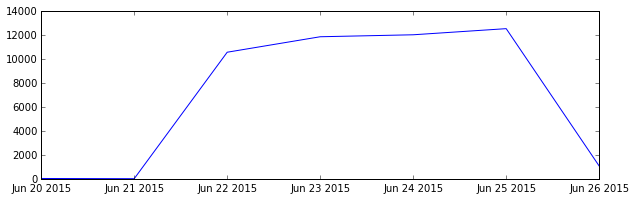

In [28]:
plt.figure(figsize=(10,3))
plt.plot(dates,counts)

The plot is a solution to challenge 7.  Note that this station was closed over the weekend.  
(I know from living there)

###Challenge 8

In [9]:
df_test = pd.read_csv('turnstile_data_2015/turnstile_150103.txt')
df_test.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,12/27/2014,03:00:00,REGULAR,4936840,1672747
1,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,12/27/2014,07:00:00,REGULAR,4936852,1672762
2,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,12/27/2014,11:00:00,REGULAR,4936909,1672839
3,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,12/27/2014,15:00:00,REGULAR,4937131,1672892
4,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,12/27/2014,19:00:00,REGULAR,4937588,1672949


Note: the block below reads csv files as needed & converts the columns as above

In [11]:
from datetime import datetime, timedelta, date

folder_path = 'turnstile_data_2015' #change to folder where mta data is located

def get_file_names(start, end):
    list_of_files = []
    start_dow = start.weekday()
    #print start_dow
    start += (timedelta((5 - start_dow) % 7))
    while start < end:
        list_of_files.append(folder_path + '/turnstile_' + start.strftime('%y%m%d') + '.txt')
        start += timedelta(7)
    return list_of_files

pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 200)

list_of_files = []
list_of_frames = []


    #the block below reads csv data as needed from the mta files & changes the columns to make analysis easier

currDate = date(2015, 1, 3)
while currDate < date(2015, 2, 1):
    list_of_files.append(folder_path + '/turnstile_' + currDate.strftime('%y%m%d') + '.txt')
    currDate += timedelta(7)
list_of_frames = [read_file(filename) for filename in list_of_files]
big = pd.concat(list_of_frames, ignore_index = True)

start = date(2015, 3, 1)
end = date(2015, 6, 1)
files = get_file_names(start, end)
frames = [read_file(file) for file in files]


###Note: the following blocks were incremental experiments until the final block, which produces the solution

In [15]:
big = pd.concat(frames, ignore_index = True)
big = big.dropna(subset = ['entries', 'exits'])
big = makeCols(big)

big.head()

,station,datetime,date,time,entries,exits
1,"(LEXINGTON AVE, 456NQR)",2015-02-28 11:00:00,02/28/2015,11:00:00,81,80
2,"(LEXINGTON AVE, 456NQR)",2015-02-28 15:00:00,02/28/2015,15:00:00,198,66
3,"(LEXINGTON AVE, 456NQR)",2015-02-28 19:00:00,02/28/2015,19:00:00,381,57
4,"(LEXINGTON AVE, 456NQR)",2015-02-28 23:00:00,02/28/2015,23:00:00,211,21
5,"(LEXINGTON AVE, 456NQR)",2015-03-01 03:00:00,03/01/2015,03:00:00,58,12


In [32]:
big['dayofweek'] = big['datetime'].dt.weekday
big.head(20)

,station,datetime,date,time,entries,exits,dayofweek
1,"(LEXINGTON AVE, 456NQR)",2015-02-28 11:00:00,02/28/2015,11:00:00,81,80,5
2,"(LEXINGTON AVE, 456NQR)",2015-02-28 15:00:00,02/28/2015,15:00:00,198,66,5
3,"(LEXINGTON AVE, 456NQR)",2015-02-28 19:00:00,02/28/2015,19:00:00,381,57,5
4,"(LEXINGTON AVE, 456NQR)",2015-02-28 23:00:00,02/28/2015,23:00:00,211,21,5
5,"(LEXINGTON AVE, 456NQR)",2015-03-01 03:00:00,03/01/2015,03:00:00,58,12,6
6,"(LEXINGTON AVE, 456NQR)",2015-03-01 07:00:00,03/01/2015,07:00:00,6,8,6
7,"(LEXINGTON AVE, 456NQR)",2015-03-01 11:00:00,03/01/2015,11:00:00,41,55,6
8,"(LEXINGTON AVE, 456NQR)",2015-03-01 15:00:00,03/01/2015,15:00:00,182,55,6
9,"(LEXINGTON AVE, 456NQR)",2015-03-01 19:00:00,03/01/2015,19:00:00,214,52,6
10,"(LEXINGTON AVE, 456NQR)",2015-03-01 23:00:00,03/01/2015,23:00:00,122,21,6


In [45]:
big_turnstile_counts = aggregate_turnstiles(big)
big_turnstile_counts.head(100)

,station,date,datetime,entries
0,"(1 AVE, L)",02/28/2015,2015-02-28 07:00:00,408
1,"(1 AVE, L)",02/28/2015,2015-02-28 11:00:00,1951
2,"(1 AVE, L)",02/28/2015,2015-02-28 15:00:00,4119
3,"(1 AVE, L)",02/28/2015,2015-02-28 19:00:00,4876
4,"(1 AVE, L)",02/28/2015,2015-02-28 23:00:00,4739
5,"(1 AVE, L)",03/01/2015,2015-03-01 03:00:00,2655
6,"(1 AVE, L)",03/01/2015,2015-03-01 07:00:00,449
7,"(1 AVE, L)",03/01/2015,2015-03-01 11:00:00,1457
8,"(1 AVE, L)",03/01/2015,2015-03-01 15:00:00,3747
9,"(1 AVE, L)",03/01/2015,2015-03-01 19:00:00,3834


In [46]:
big_turnstile_counts['weekofyear'] = big_turnstile_counts['datetime'].dt.week
big_turnstile_counts['dayofweek'] = big_turnstile_counts['datetime'].dt.weekday
big_turnstile_counts.head(100)

,station,date,datetime,entries,weekofyear,dayofweek
0,"(1 AVE, L)",02/28/2015,2015-02-28 07:00:00,408,9,5
1,"(1 AVE, L)",02/28/2015,2015-02-28 11:00:00,1951,9,5
2,"(1 AVE, L)",02/28/2015,2015-02-28 15:00:00,4119,9,5
3,"(1 AVE, L)",02/28/2015,2015-02-28 19:00:00,4876,9,5
4,"(1 AVE, L)",02/28/2015,2015-02-28 23:00:00,4739,9,5
5,"(1 AVE, L)",03/01/2015,2015-03-01 03:00:00,2655,9,6
6,"(1 AVE, L)",03/01/2015,2015-03-01 07:00:00,449,9,6
7,"(1 AVE, L)",03/01/2015,2015-03-01 11:00:00,1457,9,6
8,"(1 AVE, L)",03/01/2015,2015-03-01 15:00:00,3747,9,6
9,"(1 AVE, L)",03/01/2015,2015-03-01 19:00:00,3834,9,6


In [84]:
big_day_counts = big_turnstile_counts.groupby(['station', 'weekofyear', 'dayofweek'])['entries'].agg(np.sum).reset_index()
big_day_counts.head(100)
dc = big_day_counts
dc.tail(100)

,station,weekofyear,dayofweek,entries
42097,"(YORK ST, F)",14,2,9912
42098,"(YORK ST, F)",14,3,9944
42099,"(YORK ST, F)",14,4,8128
42100,"(YORK ST, F)",14,5,5129
42101,"(YORK ST, F)",14,6,4129
42102,"(YORK ST, F)",15,0,8634
42103,"(YORK ST, F)",15,1,9066
42104,"(YORK ST, F)",15,2,8893
42105,"(YORK ST, F)",15,3,8754
42106,"(YORK ST, F)",15,4,8565


In [77]:
dow_dict = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
                4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

dc['days'] = dc['dayofweek'].apply(lambda x: dow_dict[x])
dc1 = dc[dc.station == ('RECTOR ST', '1')]
dc1 = dc[dc.weekofyear == 11]
dc1.head(7)

days = dc1['dayofweek'].tolist()
counts = dc1['entries'].astype(int).tolist()
print days[:7], counts[:7]



[0, 1, 2, 3, 4, 5, 6] [23140, 24495, 24550, 25389, 26065, 19865, 17446]


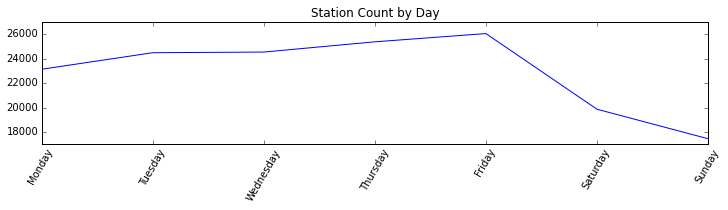

In [83]:
days1 = days[:7]
counts1 = counts[:7]
plt.figure(figsize=(10,3))
plt.xticks(range(7), [dow_dict[i] for i in range(7)], rotation = 60)
plt.title('Station Count by Day')
plt.tight_layout()
plt.plot(days1,counts1)

[[9839, 11389, 9405, 11396, 11851, 5089, 4965],
 [10762, 11350, 11747, 12048, 11370, 5899, 4612],
 [10430, 11558, 11855, 11395, 11515, 6133, 4855],
 [11442, 12483, 11876, 13266, 9977, 6417, 4712],
 [10754, 11241, 11165, 10292, 10797, 6573, 4868],
 [10590, 11362, 11819, 11885, 11786, 6124, 4834],
 [9947, 11839, 11400, 12297, 12197, 6335, 4961],
 [10526, 11826, 11777, 12028, 11790, 6029, 5042],
 [11234, 11715, 11493, 11991, 11974, 5809, 4214],
 [10792, 11523, 11969, 12341, 12265, 6443, 5055]]

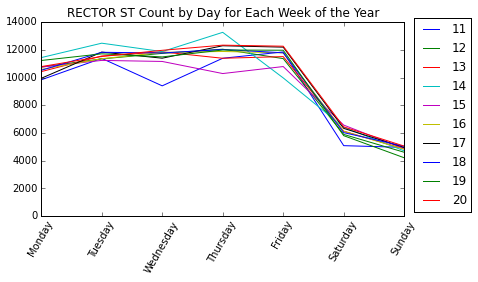

In [129]:
def weekly_counts_by_day(df = dc, station = ('RECTOR ST', '1'), start = 11, end = 20):
    s = df[df.station == station]
    week_count_list = []
    plots = pd.DataFrame(index =[i for i in range(7)])
    for i in range (start, end+1):
        w = s[s.weekofyear == i]
        days = w['dayofweek'].tolist()
        counts = w['entries'].astype(int).tolist()
        week_count_list.append(counts)
        plots[i] = counts
    plt.figure(figsize=(10,3))
    plots.plot()
    plt.xticks(range(7), [dow_dict[i] for i in range(7)], rotation = 60)
    plt.ylim(ymin = 0)
    plt.title( station[0] +' Count by Day for Each Week of the Year')
    plt.tight_layout()
    plt.legend(bbox_to_anchor=(1.2, 1.05))
    plt.savefig(station[0].replace(' ', '_') + '_daycountsbyweek.png')
    return week_count_list
        
weekly_counts_by_day()
    

The function `weekly_counts_by_day()` returns both the `week_count_list` and saves the rainblow plots.  
Therefore it is a solution to Challenge 8.

###Challenge 9

In [148]:
def n_busiest_stations(df, n = 150):
    s= df.groupby('station')['entries'].agg(np.sum)
    return s.nlargest(n)

busiest = n_busiest_stations(big)
busiest.head(25)

station
(42 ST-GRD CNTRL, 4567S)          11903545
(34 ST-HERALD SQ, BDFMNQR)         9746436
(14 ST-UNION SQ, 456LNQR)          9002155
(42 ST-TIMES SQ, 1237ACENQRS)      8141761
(34 ST-PENN STA, ACE)              6777441
(42 ST-PA BUS TE, 1237ACENQRS)     6393550
(59 ST-COLUMBUS, 1ABCD)            6101594
(FULTON ST, 2345ACJZ)              5474199
(86 ST, 456)                       5312903
(MAIN ST, 7)                       4902434
(47-50 ST-ROCK, BDFM)              4615873
(34 ST-PENN STA, 123ACE)           4487527
(ROOSEVELT AVE, 7EFMR)             4197336
(59 ST, 456NQR)                    4104654
(CANAL ST, 6JNQRZ)                 3853266
(W 4 ST-WASH SQ, ABCDEFM)          3707121
(BARCLAYS CENTER, 2345BDNQR)       3591943
(PATH WTC, 1)                      3427702
(96 ST, 123)                       3417872
(LEXINGTON-53 ST, 6EM)             3333181
(JAMAICA CENTER, EJZ)              3268397
(72 ST, 123)                       3204956
(JAY ST-METROTEC, ACF)             3202857
(BO

The list above is a solution to challenge 9.

###Challenge 10

In [149]:
busy_stations = busiest.index
total_counts = busiest.values
#print busy_stations[:10], total_counts[:10]

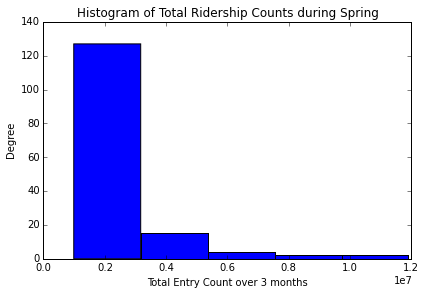

In [151]:
plt.figure()
busiest.plot(kind='hist', bins=5)
plt.tight_layout()
plt.xlabel('Total Entry Count over 3 months')
plt.title('Histogram of Total Ridership Counts during Spring')
plt.savefig('total_ridership_histogram.png')

The histogram above shows the expected distribution for the ridership and is the solution for Challenge 10.
